## Project: Predicting Boston Housing Prices
This project was done as part of Machine learning Udacity nanodegree

In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). 

The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.




In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration

In this section of this project, we will make some investigation about the Boston housing data and provide your observations. 

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

We will give some decriptive statistics and also study corelation between features

In [2]:
minimum_price = np.min(prices)

maximum_price = np.max(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

std_price = np.std(prices)

print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


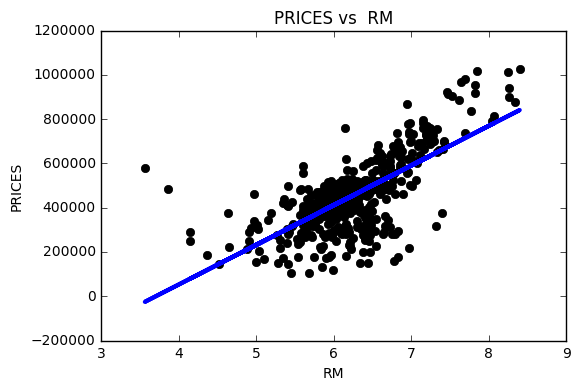

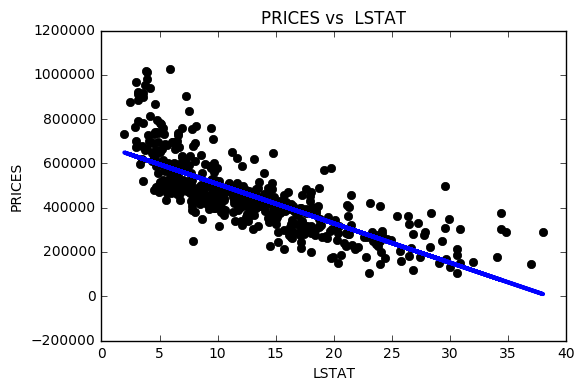

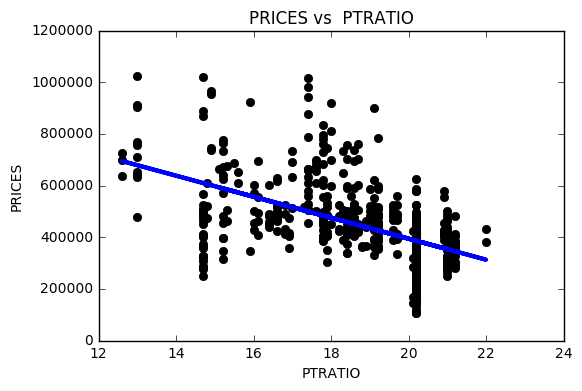

In [3]:
# Corletaion betwwen features and target variable
import matplotlib.pyplot as plt

for col in features.columns:
    fig, ax = plt.subplots()
    fit = np.polyfit(features [col], prices, deg=1) # We use a linear fit to compute the trendline
    ax.scatter(features [col],  prices)
    plt.plot(features [col], prices, 'o', color='black')
    ax.plot(features[col], fit[0] * features[col] + fit[1], color='blue', linewidth=3) # This plots a trendline with the regression parameters computed earlier. We should plot this after the dots or it will be covered by the dots themselves
    plt.title('PRICES vs  '+ str(col)) 
    plt.xlabel(col) 
    plt.ylabel('PRICES')

Feature Observation
We are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

So in my opinion:

1) RM: In my opinion with increase in RM, I expect the house price(MEDV) to go up as increase in total area of house means you have to pay more.

2) LSTAT: With increase in this feature, I expect the MEDV to go down, as lower class people cannot pay for high house prices hence will go down.

3) PTRATIO: Increase in this value will decrease MEDV value. It is because a I would consider if the ratios is small we have more teachers for students which is better. Such a school will be considered as a better school than rest of the schools and a neighbourhood with high qulaity education institutes should cost more.

If we look at the corelation plots above they also give us an idea which is on the same lines as mentioned here.

## Developing a Model
In this second section of the project, we will develop the techniques necessary for a model to make a prediction. 
But first we need to have an evaluation metric.

This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._


In [4]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

Goodness of Fit

Le us Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |


In [5]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


I would consider the model to have captured the variation of target variable. A R^2 value of more than 0.923 means it explains for 92% of variation in target value which is quite good.

## Shuffle and Split Data

Next we will take  Boston housing dataset and split the data into training and testing subsets.The data is shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [6]:
from sklearn.cross_validation import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


The benefit of splitting a dataset into training and testing is that we can test our model on totally unseen data. It helps us to make sure that our model is not overfitting the data. It could happen that model even captures noise when being trained on training data and hence forms poorly on new data which defeats our purpose.

## Analyzing Model Performance
In this section of the project,we will take a look at several models' learning and testing performances on various subsets of training data. Additionally, we willinvestigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance.  we will also graph the performance as it help us visualise the problem and undertsnad the behaviour.

### Learning Curves
Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  



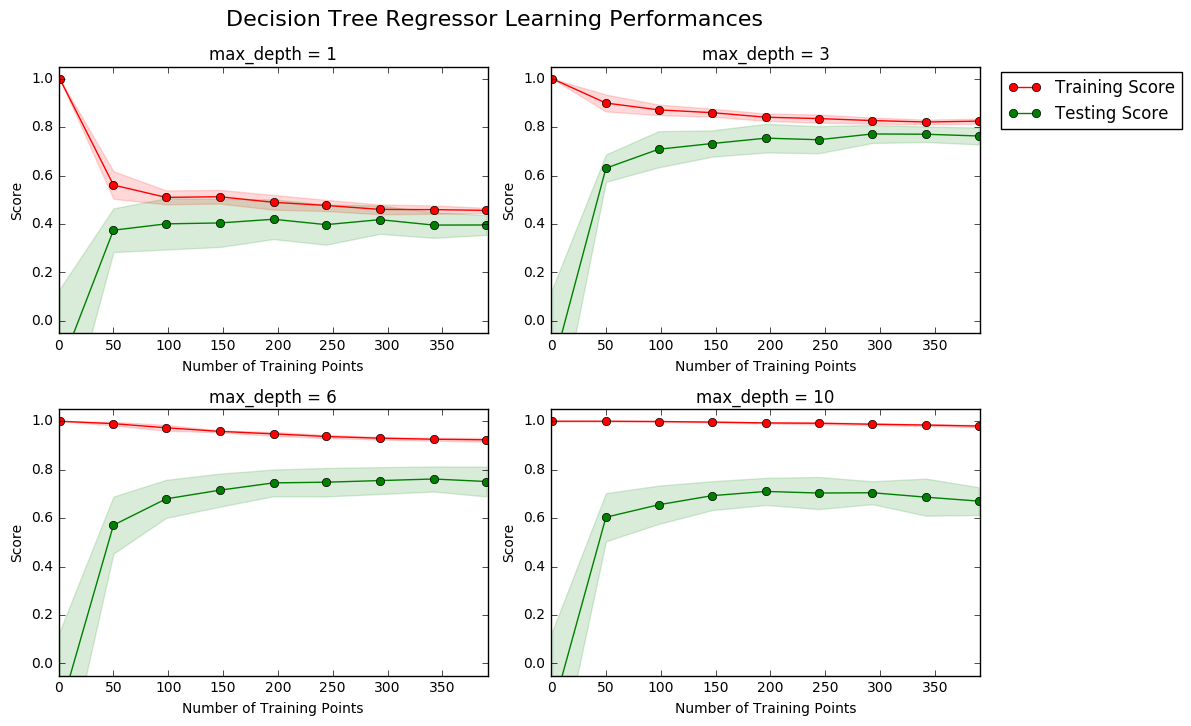

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

So let us take us the case of Graph with a max depth of 3.
The score of the training curve decreases initially but then it the drop becomes very marginal and converges to around a value of 0.8.
The testing curve increases substantially intitally but then the rate of increase becomes less and finally setlles down to just under a vlue of 0.8.
Genrally speaking more the data is always better but more specifically it will not help a big deal. The curves are already converging and hence adding more data will not have a significant impact.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

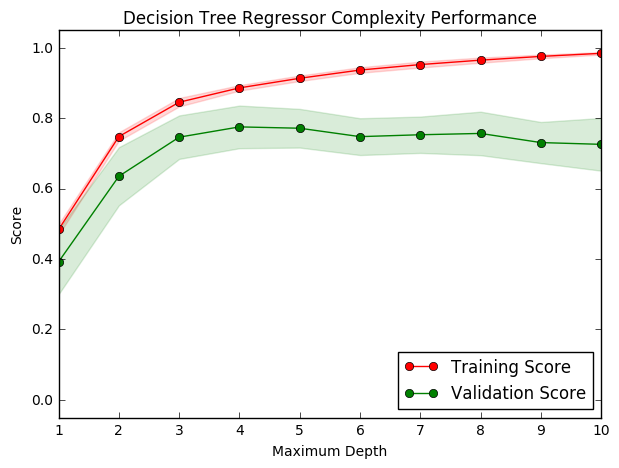

In [8]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

When the model is trained with maximum depth of 1, it has a problem of high bias or underfittng.

In case of maximum depth 10, it has a problem of high variance or overfitting.

The model is not only suffering from high bias initially(max depth =1) but also the training and validation score is at the lowest. Both the scores are still increasing with the maximum depth value.

But after the max depth  =4 or 5 we see that though the score of training data is still increasing but the score of validation data has started decreasing giving us an idea that we are moving towards overfitting. The model is now also try to capture the noise in training data and has started performing poorly on unseen data. As we approch maximum depth =10 we see that the training score is almost approching 1 and the gap is fuether widening between training and validation.

### Best-Guess Optimal Model

In my opinion maximum depth = 4 could be the best for unseen data. I reckon because after that though the training score is still increasing the drop in validation score points out that the model is moving towards overfitting.

## Evaluating Model Performance
In this section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

###  Grid Search
Grid search is a technique which help us to tune paramaters as it tests various combinations of different parameters  through cross validation. It is applied by setting up a dictionary of diiferent parmaeters and different values it can take and finally takes in the learning. algorithm along with paramters.
It helps us to choose the best values of parameters for our model.

### Cross-Validation
K fold cross validation is a technique where the data is divided into k sets. We train on k-1 sets of data and test on the remaining sets. We do it for all k possible combinations hence every set once becomes a validation data. It helps us as we do not need to split our dataset into 2 parts and also can have more data to train on helping in accuracy.

The technique is used in conjuction with grid search as after training each combination we can test it on a vlidation dataset to check how good the trained model is performing on validation(unseen dataset), thus helping us in preventing overfitting.

### Implementation: Fitting a Model
the final implementation requires that we bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, wewill train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. 




In [9]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, cv = cv_sets, scoring = scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**.

### Optimal Model

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


he max depth the optimal model has is 4. In graphs also I had seen it to be 4 as well and this further substantiates the fact what I saw from graphs

###  Predicting Selling Prices
Let us Imagine that we were a real estate agent in the Boston area looking to use this model to help price homes owned by our clients that they wish to sell.we have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $391,183.33
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


In [12]:
# Some additional stats
print "Mean rooms : {:,.2f}".format(np.mean(features['RM']))
print "Mean Poverty level : {:,.2f}".format(np.mean(features['LSTAT']))
print "Mean Student teacher ratio  : {:,.2f}".format(np.mean(features['PTRATIO']))

Mean rooms : 6.24
Mean Poverty level : 12.94
Mean Student teacher ratio  : 18.52


In my opinion these prices look reasonable. In general as I had talked above increase in number of rooms, decrease in neighbourhood poverty and a lower student teacher ratio increases the house prices. The Mean price being: 454,342.94 and Median price being 438,900.00 does give us an idea. 

In case of client 1 we see that rooms are 5 which is just less than average rooms(6.2), poverty level being higher and student teacher ratio just a little better than the mean one(these are calculated in the above cell), does tell us should be somewhat less than mean but still not be too far. In case of client 3 we have 8 rooms with very less poverty rate and also a low student teacher ratio pointing us in the direction of substantially a very high price of house but still less than the maximum price of 1,024,800.00. In contrast on client 2 we have almost all 3 factors going substanitally on the wrong side of the average values and hence should be closer to the minimum value of the house which was $105,000.00.

In [13]:
from sklearn.neighbors import NearestNeighbors
num_neighbors =5
def find_nearest_neighbor_indexes(x,X):
    
    neigh = NearestNeighbors(num_neighbors)
    neigh.fit(X)
    _,indexes = neigh.kneighbors(x)
    return indexes

def nearest_neighbor_price(x):
    indexes = find_nearest_neighbor_indexes(x,features)
    sum_prices = []
    for i in indexes:
        sum_prices.append(prices[i])
    neighbor_avg = np.mean(sum_prices)
    return neighbor_avg

cnt = 0  
for item in client_data:
    val=nearest_neighbor_price([item])
    cnt += 1
    print "The average predicted nearest neighbors price for home {} is: ${:,.2f}".format(cnt, val)

The average predicted nearest neighbors price for home 1 is: $372,540.00
The average predicted nearest neighbors price for home 2 is: $162,120.00
The average predicted nearest neighbors price for home 3 is: $897,120.00


Additionally if we look at the prices of house with similar features as clients we do see that they are quite close to the predicted values. It also gives further evidence that the prediction is on the righ track

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. we will run the code below multiple times to see the changes on prediction

In [14]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Applicability
In my opinion the constructed model should not really be used in real-world setting. Firstly, the data was collected in 1978 and lot may have changed. Though we did alter the prices keeping inflation in mind but other factors could have chnaged. No of rooms or area of the property would still be pretty similar but other features could be diiferent. The features such as poverty rate of even student teacher ratio could be totally different now and hence could be change the dynamics of the trained model Additionally, we may need more features for today as now days the price would also be determined by factors shuch as ease and closenees to supermarkets, public transport or for that distance to work places. Moreover, the data which is collected in setting of an urban city such as Boston cannot be applied to rural areas as the factors for rural areas will be different. We may need featues like ease of irrigation etc.